## AllLife Credit Card Customer Segmentation<br>
**Background:** AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.<br><br>
**Objective:** To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.<br><br>
**Key Questions:**
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?<br><br>

**Data Description:** Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.<br><br>
### Unsupervised Techniques Methods:
**K-Means Clustering**<br>
**Hierarchical Clustering (Agglomerative)**<br>
**Silhouette**<br>

## Prepared by: 
**Plinio Monteiro**    

In [147]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, gc
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
%matplotlib inline

# Models
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer 
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

# Display settings
pd.options.display.max_rows = 400
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

In [148]:
# Reading the excel data as dataframe and print the first five rows
Card_df = pd.read_excel('Credit Card Customer Data.xlsx')
Card_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [149]:
# Print the last 5 rows of the dataset
Card_df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [150]:
Card_df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [151]:
Card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [152]:
Card_df.shape

(660, 7)

In [153]:
Card_df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### Observation:

1. Data set has 660 rows with 7 columns and no missing values. Also, the isna confirms that there is no missing values.
2. We can see that all the entries in data are non-null. Means no missing values.
3. All data-types are int64.


## Exploratory Data Analysis

In [154]:
Card_df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.00,330.50,190.67,1.00,165.75,330.50,495.25,660.00
Customer Key,660.00,55141.44,25627.77,11265.00,33825.25,53874.50,77202.50,99843.00
Avg_Credit_Limit,660.00,34574.24,37625.49,3000.00,10000.00,18000.00,48000.00,200000.00
Total_Credit_Cards,660.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,660.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,660.00,2.61,2.94,0.00,1.00,2.00,4.00,15.00
Total_calls_made,660.00,3.58,2.87,0.00,1.00,3.00,5.00,10.00


### Obervation: Descriptive Statistics for the variables
- Si_No and Customer Key are not needed to the clustering analysis.
- Avg_Credit_Limit range of Q1 to Q3 is 10,000 to 48,000 with the mean at 34,574.24 and the median at 180,000.
- Total_Credit_Cards range of Q1 to Q3 is 3 to 6 with the mean at 4.71 and the median at 5. 
- Total_visits_bank range of Q1 to Q3 is 1 to 4 with the mean at 2.4 and the median at 2.
- Total_visits_online range of Q1 to Q3 is 1 to 4 with the mean at 2.61 and the median at 2.
- Total_calls_made range of Q1 to Q3 is 1 to 5 with the mean at 3.58 and the median at 3.
- Total_Credit_Cards, Total_visits_bank, Total_visits_online and Total_calls_made appears to be Normally distributed (mean ~= median)

### Let's Remove Si_No and Customer Key since it is irrelevant to the model

In [155]:
CardNew_df = Card_df.drop(['Sl_No', 'Customer Key'], axis=1)

In [156]:
CardNew_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


### Perform Bi-Variate Analysis including correlation, pairplot, etc.

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}>,
        <AxesSubplot:title={'center':'Total_visits_online'}>],
       [<AxesSubplot:title={'center':'Total_calls_made'}>,
        <AxesSubplot:>]], dtype=object)

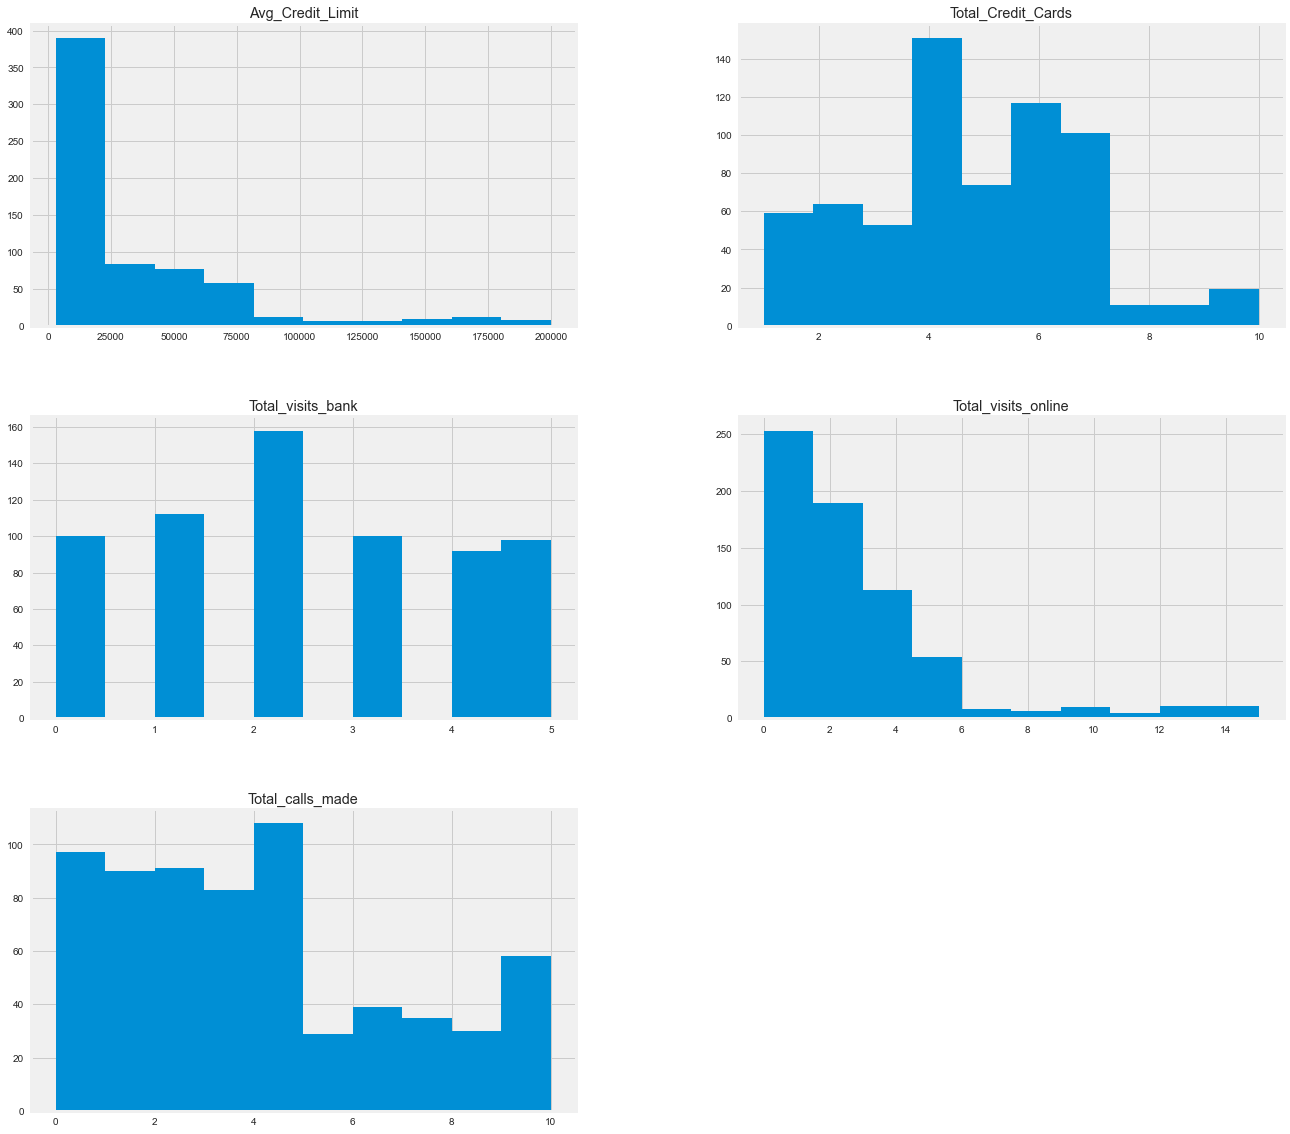

In [157]:
##########################################################################################################
# Let's use a set of Histograms to visualize the data distribution.    ###################################
##########################################################################################################
CardNew_df.hist(figsize=(20, 20))

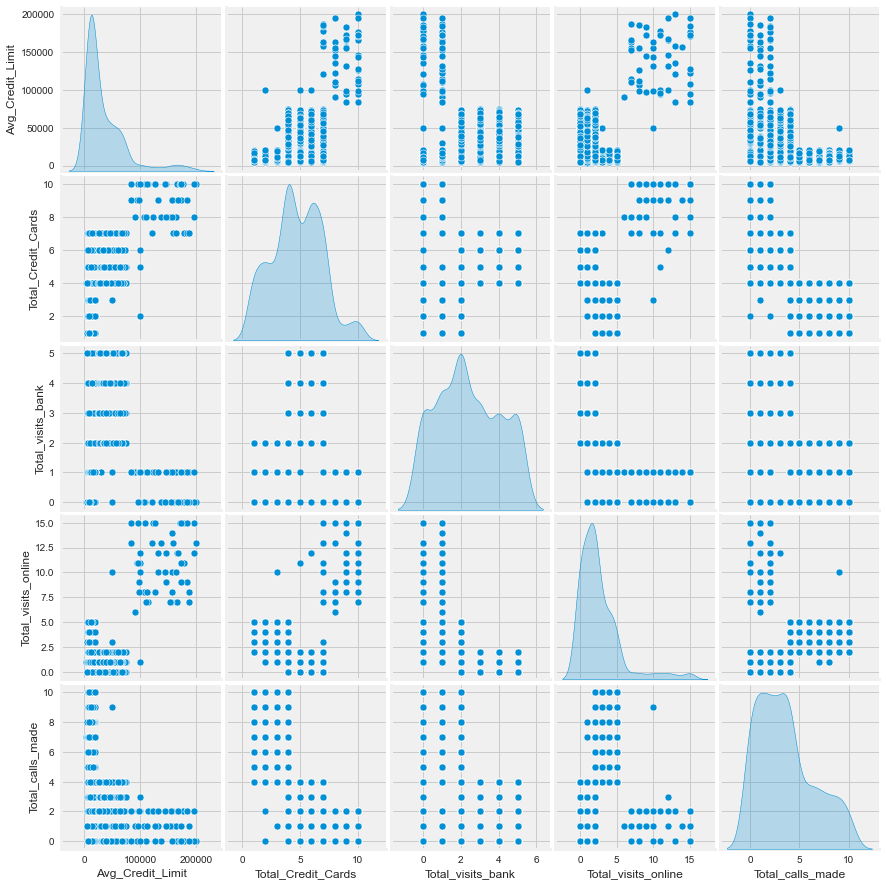

In [158]:
# Let's run a pairplot to determine if any new insight about the data distribution can be learned
sns.pairplot(CardNew_df, diag_kind = 'kde')
plt.show()

### Observations:
- It is noted above that Total_Credit_Cards and Total_Visit_Bank have between 4 and 5 picks. 
- This indicates that between 4 and 5 clusters may be the proper number of clusters. 
- Also there is no need to perform PCA since the variables are not linear related and number of dimensions are low.

<AxesSubplot:>

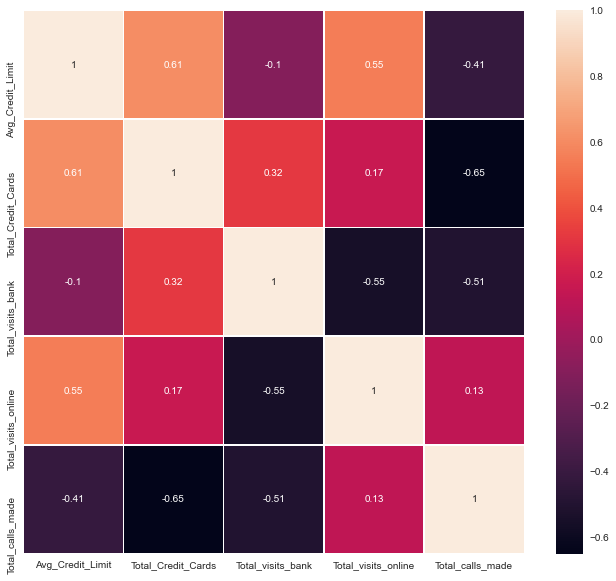

In [159]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
corr = CardNew_df.corr()
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [160]:
#####################################################################
# Select the correlations where coefficient of correlation is > 0.3
#####################################################################
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.3) & (sort < 1)]

Total_calls_made     Total_Credit_Cards    0.65
Total_Credit_Cards   Total_calls_made      0.65
Avg_Credit_Limit     Total_Credit_Cards    0.61
Total_Credit_Cards   Avg_Credit_Limit      0.61
Total_visits_online  Total_visits_bank     0.55
Total_visits_bank    Total_visits_online   0.55
Total_visits_online  Avg_Credit_Limit      0.55
Avg_Credit_Limit     Total_visits_online   0.55
Total_calls_made     Total_visits_bank     0.51
Total_visits_bank    Total_calls_made      0.51
Avg_Credit_Limit     Total_calls_made      0.41
Total_calls_made     Avg_Credit_Limit      0.41
Total_Credit_Cards   Total_visits_bank     0.32
Total_visits_bank    Total_Credit_Cards    0.32
dtype: float64

### Observations:
- Majority of customers (~ 380 customers) have an Avg_Credit_Limit between approximately 3K and 25K.
- Majority of customers have Total_Credit_Cards > 4. With largest concentration between 4 and 5 credit cards.
- Total_calls_made is reasonably correlated to Total_Credit_Cards.
- Avg_Credit_Limit is reasonably correlated to Total_Credit_Cards.
- Total_visits_online and Total_visits_bank are also correlated.
- From the bivariate plots we can see that Total_Credit_Cards shows negative liner relationship with Total_Calls_Made.
- Total_visits_bank shows a mild negative linear relationship with Total_Calls_Made and Total_visits_Online.
- Total_Calls_Made has a mild negative linear relationship with Total_Credit_Cards and Total_visit_bank.<br><br>
- **The linear relationship strenght does not appears to be strong enough for requiring PCA.**<br><br>
 
- **Based on the pairplot, we can infer that between 4 and 5 clusters may be the right number.**
-   Total_Credit_Cards with about 4 possible peaks and Total_visit_bank with about 5 possible peaks.

## K-Means Standardize Variables and imputation for Outliers

In [161]:
#####################################################################################################
# Function to plot boxplot and distplot depicting possible Outliers in the dataset. #################
#####################################################################################################

def EDA_Plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 8))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'blue')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'orange', fit = norm, rug = True).set_title(f'{col} with outliers')
    ax2.axvline(df[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax2.axvline(df[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax2.axvline(df[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax2.legend(loc = 'best')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'green', fit = norm, rug = True).set_title(f'{col} without outliers')
    ax3.axvline(y[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax3.axvline(y[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax3.axvline(y[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax3.legend(loc = 'best')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()


========================================= COLUMN NAME =  Avg_Credit_Limit  =====================================

IQR Lower boundary = -47000.00  IQR higher Boundary = 105000.00

Number of rows with outliers: 39


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
615,131000,9,1,10,1
617,136000,8,0,13,0
618,121000,7,0,13,2


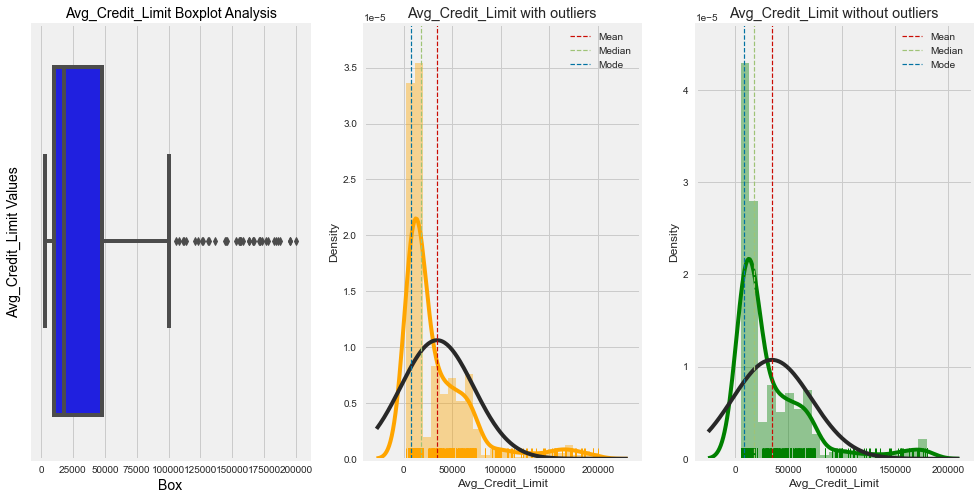

========================================= COLUMN NAME =  Total_Credit_Cards  =====================================

IQR Lower boundary = -1.50  IQR higher Boundary = 10.50

Number of rows with outliers: 0


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


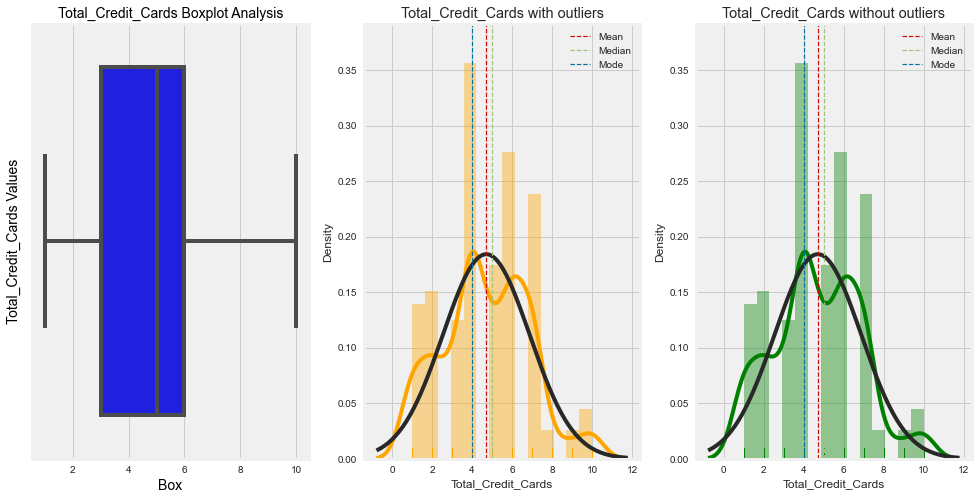

========================================= COLUMN NAME =  Total_visits_bank  =====================================

IQR Lower boundary = -3.50  IQR higher Boundary = 8.50

Number of rows with outliers: 0


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


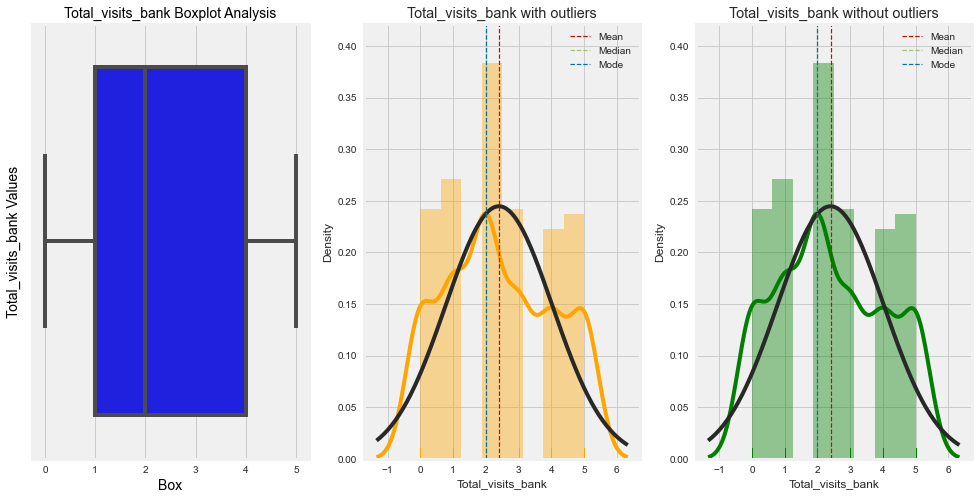

========================================= COLUMN NAME =  Total_visits_online  =====================================

IQR Lower boundary = -3.50  IQR higher Boundary = 8.50

Number of rows with outliers: 37


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
4,100000,6,0,12,3
6,100000,5,0,11,2
612,157000,9,1,14,1
613,94000,9,1,11,0


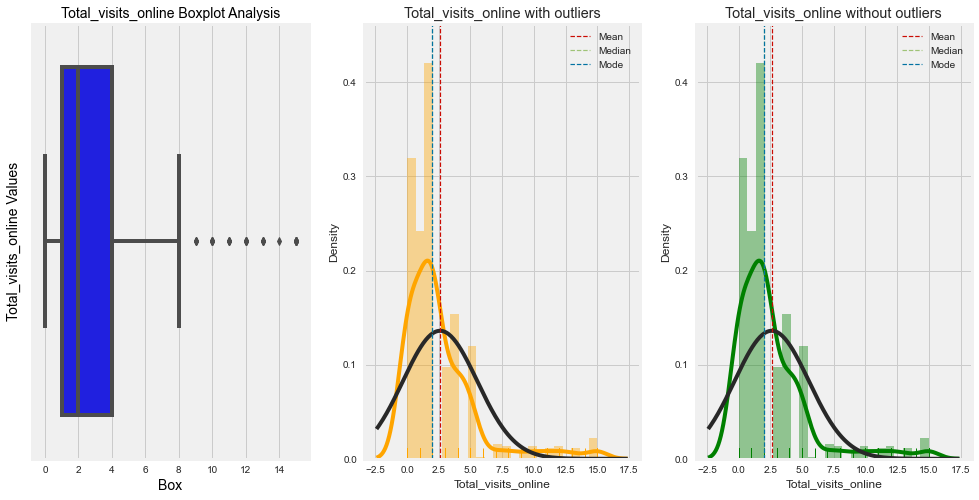

========================================= COLUMN NAME =  Total_calls_made  =====================================

IQR Lower boundary = -5.00  IQR higher Boundary = 11.00

Number of rows with outliers: 0


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


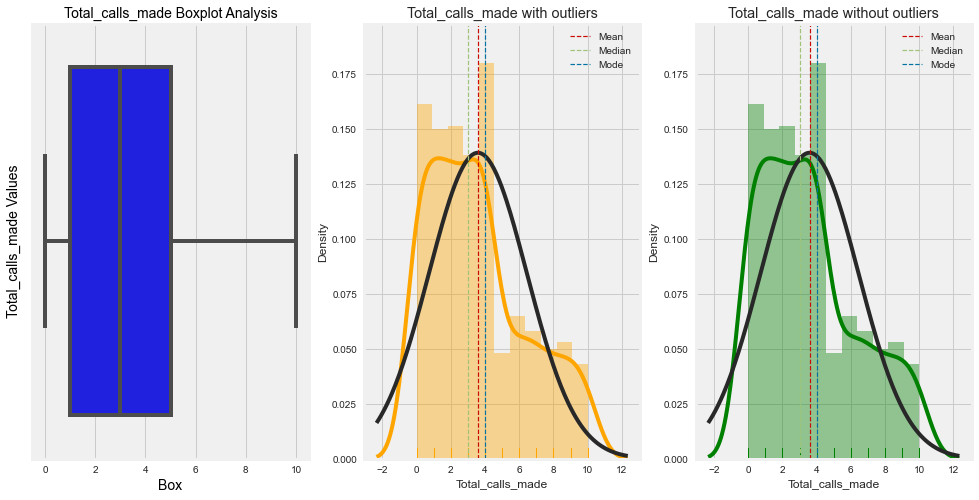

In [162]:
####################################################################################################################
# Let's apply IQR to determine Outliers    #########################################################################
####################################################################################################################

cols = list(CardNew_df.columns)        # Populate cols wih all columns variables
for x in cols:
    Q3 = CardNew_df[x].quantile(0.75)
    Q1 = CardNew_df[x].quantile(0.25)
    IQR = Q3 - Q1
    
    print('============================================================================================================')
    print('========================================= COLUMN NAME = ', x, ' =====================================')
    print('============================================================================================================')
    print('')
    print('IQR Lower boundary = {0:.2f}'.format(Q1 - 1.5 * IQR), ' IQR higher Boundary = {0:.2f}'.format(Q3 + 1.5 * IQR))
    print('')
    print(f'Number of rows with outliers: {len(CardNew_df.loc[(CardNew_df[x] < (Q1 - 1.5 * IQR)) | (CardNew_df[x] > (Q3 + 1.5 * IQR))])}')
    display(CardNew_df.loc[(CardNew_df[x] < (Q1 - 1.5 * IQR)) | (CardNew_df[x] > (Q3 + 1.5 * IQR))].head())
    
    EDA_Plots(CardNew_df, x)

### Observations:
- Avg_Credit_Limit and Total_Visits_Online have Outliers.
- Let's handle these Outliers by replacing them with the overall column mean. 
- The other variables contain no Outliers and are symetric. 

## Let's address the Outliers

In [163]:
print('================================== Data Set Statistics Before Addressing Outliers =============================')
CardNew_df.describe().T

================================== Data Set Statistics Before Addressing Outliers =============================


,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.00,34574.24,37625.49,3000.00,10000.00,18000.00,48000.00,200000.00
Total_Credit_Cards,660.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,660.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,660.00,2.61,2.94,0.00,1.00,2.00,4.00,15.00
Total_calls_made,660.00,3.58,2.87,0.00,1.00,3.00,5.00,10.00


In [164]:
###############################################################################################
# Replacing the Outliers with column mean.              #######################################
###############################################################################################
Outliers_cols = ['Avg_Credit_Limit', 'Total_visits_online']

df_CardReady = CardNew_df.copy(deep = True)


for cols in Outliers_cols:
    Q3 = df_CardReady[cols].quantile(0.75)
    Q1 = df_CardReady[cols].quantile(0.25)
    IQR = Q3 - Q1
    Upper_Boundary = (Q3 + 1.5 * IQR)
    Lower_Boundary = (Q1 - 1.5 * IQR)
    
    df_CardReady.loc[(df_CardReady[cols] < Lower_Boundary) | (df_CardReady[cols] > Upper_Boundary), cols] = df_CardReady[cols].mean()
    

=================================== Data Set Statistics After Addressing Outliers ============================


,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.00,27505.14,21852.00,3000.00,10000.00,18000.00,38250.00,100000.00
Total_Credit_Cards,660.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,660.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,660.00,2.07,1.70,0.00,1.00,2.00,3.00,8.00
Total_calls_made,660.00,3.58,2.87,0.00,1.00,3.00,5.00,10.00


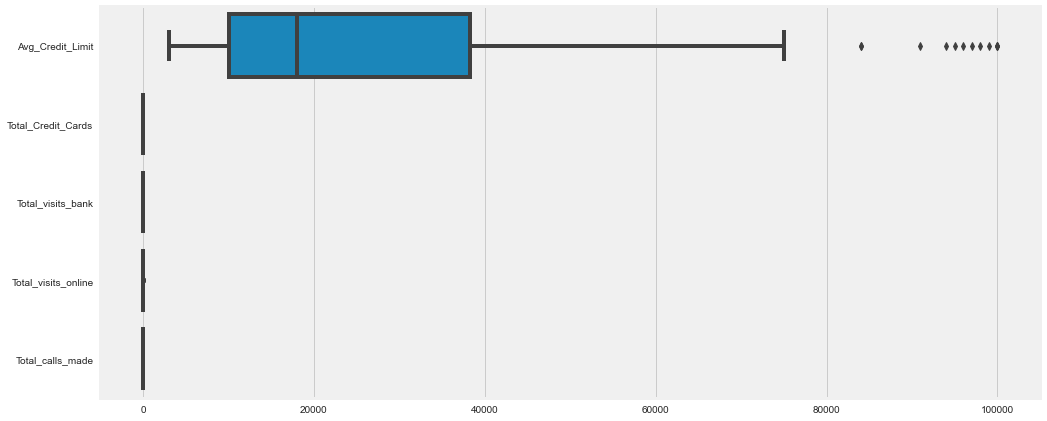

In [165]:
print('=================================== Data Set Statistics After Addressing Outliers ============================')

# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = df_CardReady, orient = 'h')

df_CardReady.describe(include = 'all').T


 ### Observations:
- Total_visits_online and Avg_Credit_Limit have their Outliers changed to the column mean values.

In [166]:
################################################################################################
# Let us apply a logaritmic transform to Avg_Credit_Limit                             ##########
################################################################################################
#df_CardReady['Avg_Credit_Limit'] = np.log(df_CardReady['Avg_Credit_Limit'])

# A quick check to find columns that contain outliers
#fig = plt.figure(figsize = (15, 7.2))
#ax = sns.boxplot(data = df_CardReady, orient = 'h')

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.00,0.00,1.00,-1.12,-0.80,-0.44,0.49,3.32
Total_Credit_Cards,660.00,-0.00,1.00,-1.71,-0.79,0.14,0.60,2.44
Total_visits_bank,660.00,0.00,1.00,-1.47,-0.86,-0.25,0.98,1.59
Total_visits_online,660.00,-0.00,1.00,-1.22,-0.63,-0.04,0.55,3.49
Total_calls_made,660.00,-0.00,1.00,-1.25,-0.90,-0.20,0.49,2.24


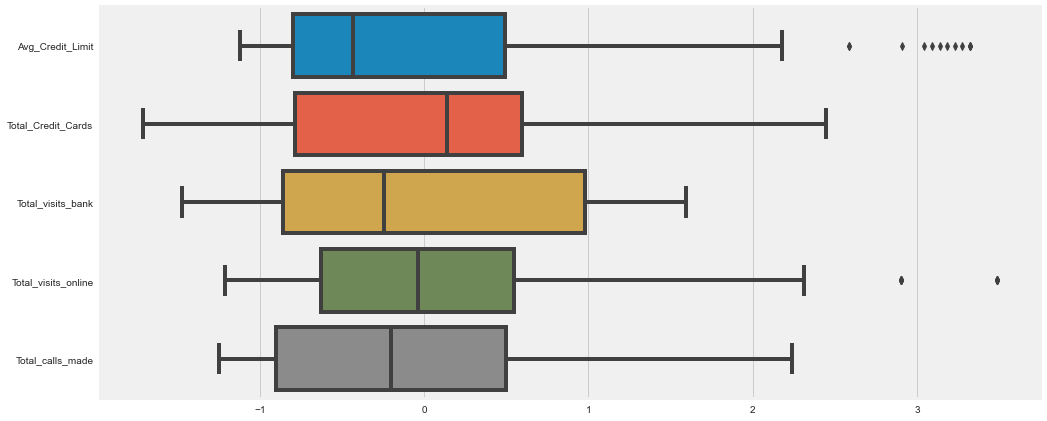

In [167]:
###########################################################################################
# Let's scale all the dataset using Z-Score.   ############################################
###########################################################################################

from scipy.stats import zscore
df_CardReady  = df_CardReady.apply(zscore)

# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = df_CardReady, orient = 'h')
df_CardReady.describe(include = 'all').T

### Observations:
- It looks much better now. We are ready to run clustering models.

In [168]:
df_CardReady.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,3.32,-1.25,-0.86,-0.63,-1.25
1,1.03,-0.79,-1.47,0.32,1.89
2,1.03,1.06,-0.86,0.55,0.15
3,0.11,0.14,-0.86,-0.63,0.15
4,3.32,0.60,-1.47,0.32,-0.20


## Elbow Method Analysis

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

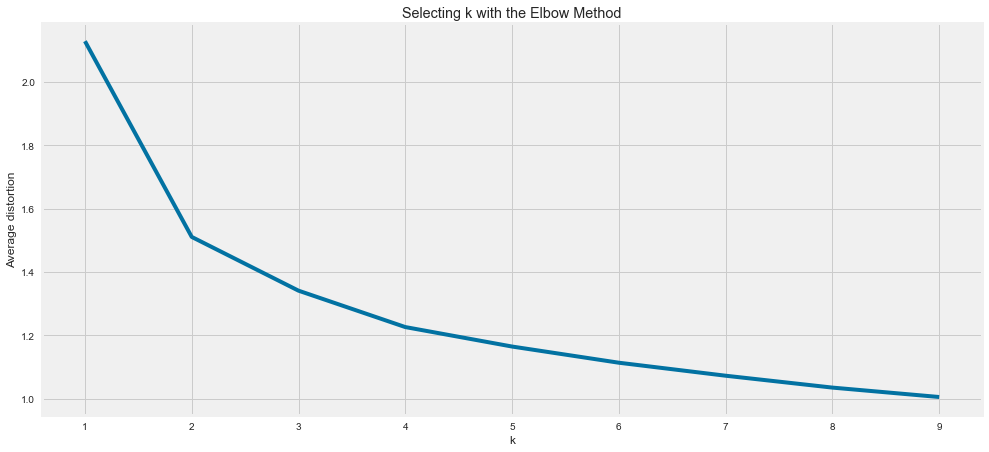

In [169]:
#############################################################################################################
# Let's use the elbow method to try to determine the proper number of clusters.                 #############
#############################################################################################################

#############################################################################################################
# Elbow is the most popular and well-known method to find the optimal no. of clusters or the value of k
# in the process of clustering. This method is based on plotting the value of cost function against different
# values of k . As the number of clusters ( k ) increases, a lesser number of points fall within clusters or
# around the centroids.
#############################################################################################################

Random_State = 7

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_CardReady)
    prediction=model.predict(df_CardReady)
    meanDistortions.append(sum(np.min(cdist(df_CardReady, model.cluster_centers_, 'euclidean'), axis=1)) / df_CardReady.shape[0])

fig = plt.figure(figsize = (15, 7.2))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

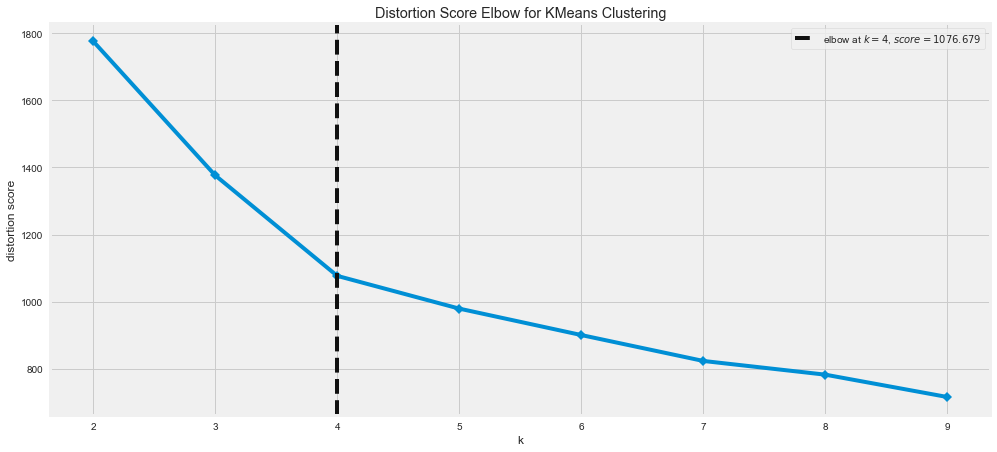

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [170]:
#################################################################################################################
# The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number 
# of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then 
# the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best 
# at that point. In the visualizer “elbow” will be annotated with a dashed line.
#################################################################################################################

from yellowbrick.cluster import KElbowVisualizer 
model= KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
fig = plt.figure(figsize = (15, 7.2))
visualizer.fit(df_CardReady)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

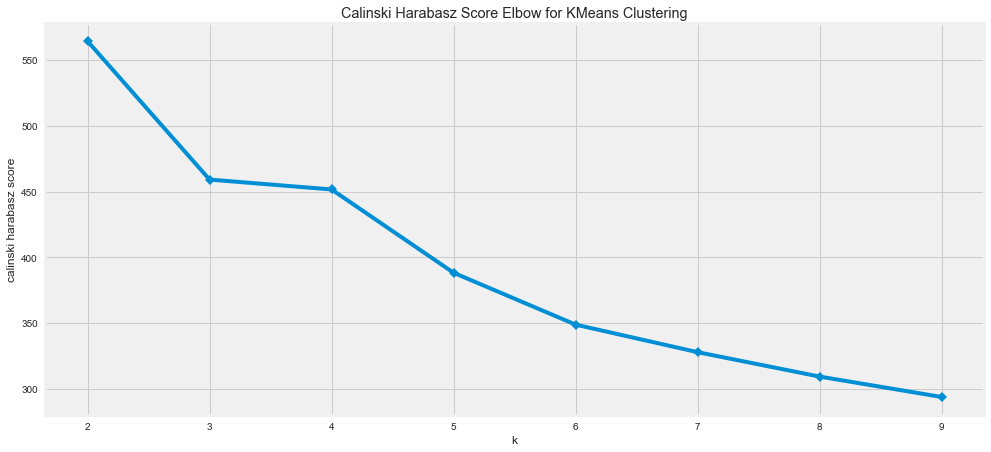

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [52]:
#############################################################################################
# Instantiate the clustering model and visualizer. Let's use the Calinsnki Harabaz Score. 
#############################################################################################
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', locate_elbow=True, timings=False)
fig = plt.figure(figsize = (15, 7.2))
visualizer.fit(df_CardReady)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Obervations:
- By using the yellowbrick Elbow Method, a vertical line is plot right at recommended number of clusters (in this case, 4).
- Also the Calinski Harabasz scores high for number of clusters = 4.

## Silhouette analysis

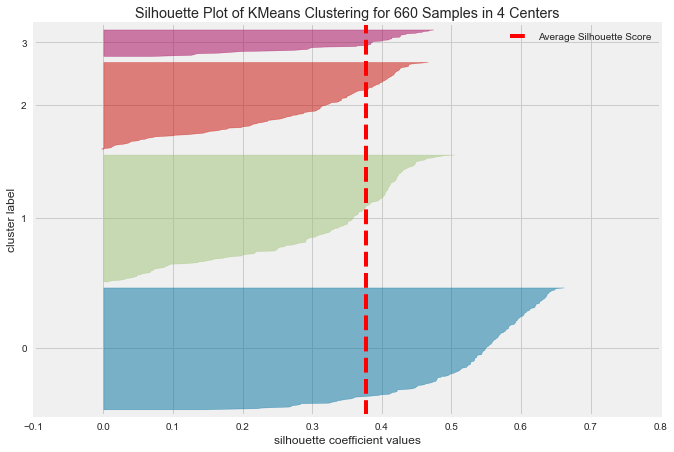

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [171]:
#############################################################################################################################
# The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density 
# of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, 
# computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for 
# each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense 
# clusters and -1 is completely incorrect clustering.
#########################################################################################################################
#

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans (4, random_state=Random_State)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
fig = plt.figure(figsize = (10, 7.2))
visualizer.fit(df_CardReady)    # Fit the data to the visualizer
visualizer.show()             # Finalize and render the figure

In [138]:
#Use silhouette score
range_n_clusters = list (range(2,8))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_CardReady)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_CardReady, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    if n_clusters == 4:
        KM_Silhouette = score

For n_clusters = 2, silhouette score is 0.43453714983185)
For n_clusters = 3, silhouette score is 0.3577058721039357)
For n_clusters = 4, silhouette score is 0.3768270271822759)
For n_clusters = 5, silhouette score is 0.3190978530506034)
For n_clusters = 6, silhouette score is 0.33141461897093766)
For n_clusters = 7, silhouette score is 0.24155264731526405)


### Observations:
- The Sillhouette plot above indicates that none of the 4 clusters is below the average Silhouette Score.
- The Sillhouette scores above, have 2 clusters with a score of **.43** and 4 clusters coming second with a score of **.38.**
- Giving that 2 clusters does not give much flexibility in terms of marketing targeting, 4 clusters will be the one adobted.


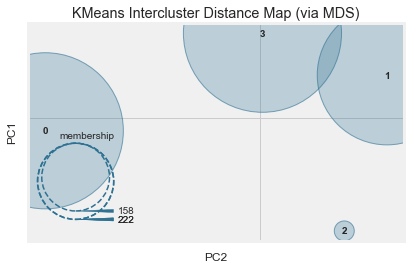

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [59]:
###############################################################################################################
# Although this might not help directly to find the number of clusters. It helps in evaluating the K-Means 
# algorithm as it gives a sense of relative importance of clusters. By default, Yellowbrick uses 
# MDS (multidimensional scaling) as an embedding algorithm to embed into 2-dimensional space. 
##############################################################################################################
from yellowbrick.cluster import InterclusterDistance 
model = KMeans(4)
visualizer = InterclusterDistance(model, random_state=Random_State)
visualizer.fit(df_CardReady)        # Fit the data to the visualizer
visualizer.show()                   # Finalize and render the figure

### Observations:
- Based on the Elbow graphs above, the point of inflection is 4. Therefore, 4 should be the optimal number of clusters. 

In [172]:
# Set the value of k=4
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=Random_State)

In [173]:
kmeans.fit(df_CardReady)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [174]:
################################################################################################
# Let's check the number of values for each cluster.   #########################################
################################################################################################
labels = kmeans.labels_
KM_counts = np.bincount(labels[labels>=0])
print(KM_counts)

[228 222 161  49]


In [175]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.45860846,  0.3563902 ,  0.75882414, -0.61473581, -0.56985545],
       [-0.70163283, -1.06415303, -0.90188848,  0.86529048,  1.1618609 ],
       [ 1.36414856,  0.38228417,  0.49943143, -0.66338174, -0.52914197],
       [ 0.83055715,  1.90688277, -1.08573721,  1.11979055, -0.8737596 ]])

In [176]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_CardReady) )
centroid_df.transpose()

,0,1,2,3
Avg_Credit_Limit,-0.46,-0.70,1.36,0.83
Total_Credit_Cards,0.36,-1.06,0.38,1.91
Total_visits_bank,0.76,-0.90,0.50,-1.09
Total_visits_online,-0.61,0.87,-0.66,1.12
Total_calls_made,-0.57,1.16,-0.53,-0.87


Text(0.5, 0.92, '3D plot of KMeans Clustering')

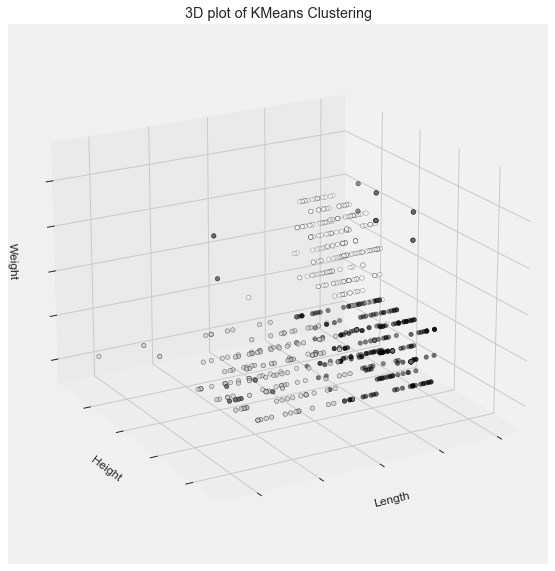

In [177]:
## 3D plots of clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7.5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(4)
k3_model.fit(df_CardReady)
labels = k3_model.labels_
ax.scatter(df_CardReady.iloc[:, 0], df_CardReady.iloc[:, 1], df_CardReady.iloc[:, 3],
           c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [412]:
# df_CardReady.drop('GROUP', axis=1, inplace=True)

In [178]:
###############################################################################################################
# Let's create the K-Means Groups and add the Group column to a new Dataframe. ################################
###############################################################################################################

final_model=KMeans(4, random_state=Random_State)
final_model.fit(df_CardReady)
prediction=final_model.predict(df_CardReady)

# Create a Dataframe for so that we can include the column Group

df_CardReadyGroup = df_CardReady.copy(deep = True)
df_CardNewGroup =  CardNew_df.copy(deep = True)

df_CardReadyGroup["GROUP"] = prediction
df_CardNewGroup["GROUP"] = prediction
print("Groups Assigned : \n")
df_CardReadyGroup[["Avg_Credit_Limit", "GROUP"]]

Groups Assigned : 



,Avg_Credit_Limit,GROUP
0,3.32,2
1,1.03,0
2,1.03,3
3,0.11,1
4,3.32,2
...,...,...
655,3.27,3
656,2.59,3
657,0.32,3
658,0.32,3


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

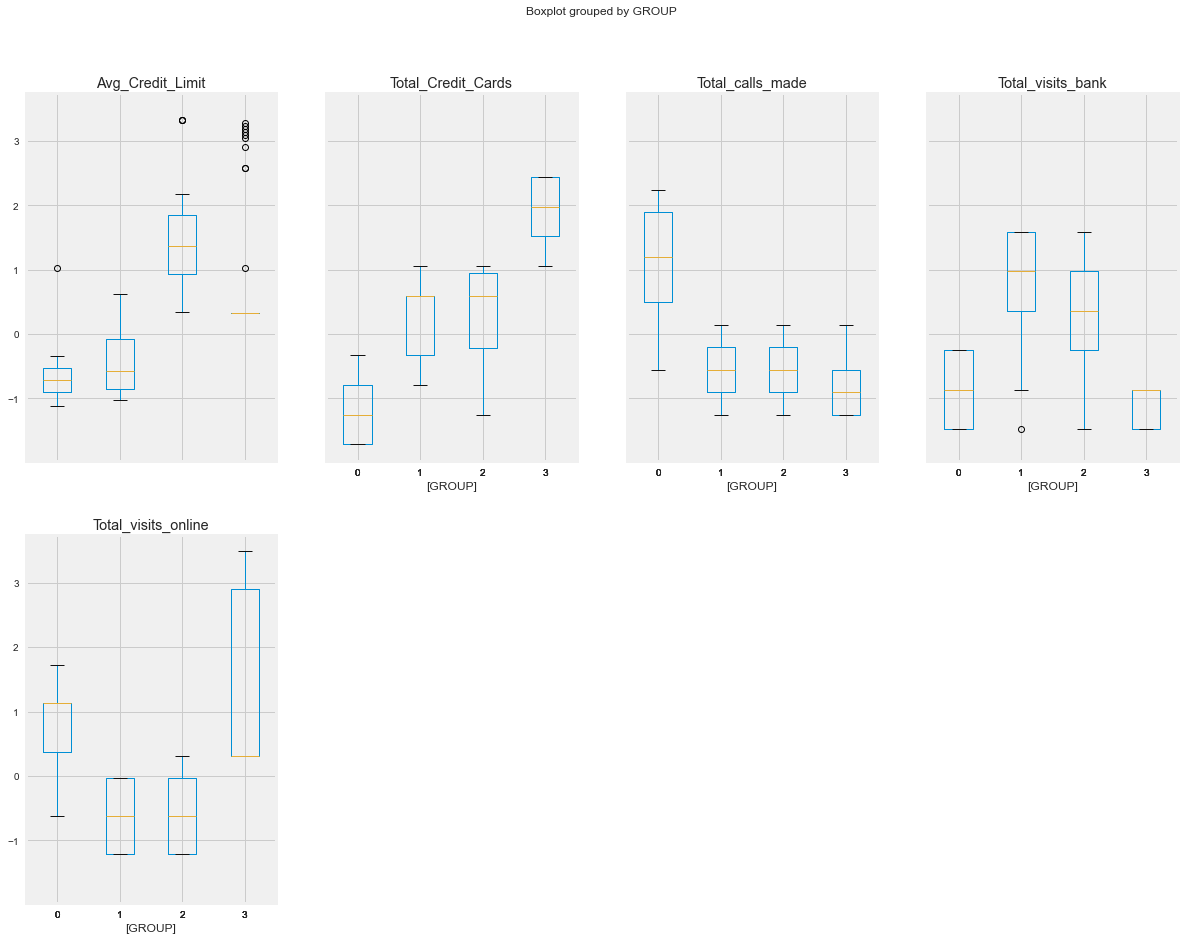

In [179]:
df_CardReadyGroup.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

In [180]:
GroupsKM = df_CardReadyGroup.groupby(['GROUP'])
GroupsKM.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,-0.70,-1.06,-0.90,0.87,1.16
1,-0.45,0.36,0.76,-0.61,-0.57
2,1.38,0.38,0.49,-0.67,-0.54
3,0.83,1.91,-1.09,1.12,-0.87


In [181]:
#############################################################################################
# Let's visualize the groups by mean values of their non-scaled data. #######################
#############################################################################################
GroupsKMNew = df_CardNewGroup.groupby(['GROUP'])
GroupsKMNew.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12184.68,2.40,0.93,3.57,6.91
1,17774.89,5.49,3.65,1.03,1.97
2,57632.91,5.52,3.20,1.04,2.05
3,140857.14,8.84,0.63,10.71,1.08


### Observations:
- Group 0 is characterized by lower Avg_Credit_Limit and higher Total_calls_made.
- Group 1 is characterized by second lower avg_Credit_Limit and higher Total_visits_bank. 
- Group 2 is characterized by second highest avg_Credit_Limit lower Total_visits_online. 
- Group 3 is characterized by highest Avg_Credit_Limit and Lower Total_visits_bank.<br><br>
- **These 4 groups segmentation provide us the opportunity of different types of Marketing Campaings.** 

In [227]:
#df_CardReady.drop('GROUP', axis=1, inplace=True)

In [84]:
#corr = df_CardReady.corr()
#####################################################################
# Select the correlations where coefficient of correlation is > 0.3
#####################################################################
#sort = corr.abs().unstack()
#sort = sort.sort_values(kind = "quicksort", ascending = False)
#sort[(sort > 0.3) & (sort < 1)]

In [424]:
# fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
# corr = df_CardReady.corr()
# sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

## Hierarchical Clustering

Much like we learned about k-means clustering, hierarchical clustering is another method for classifying our data. K-means clustering algorithm groups data into a pre-defined set of clusters based on various attributes. However in the case of hierarchical clustering, the algorithm builds classifications trees of the data that merges groups of similar data points.

With k-means, the boundaries between the various clusters are distinct and independent (see graph), whereas in hierarchical clustering, there are shared similarities between those groups that are represented by the classification tree. Going further - unlike with k-means, hierarchical clustering does not require you to define "k" as an input.

In [182]:
#from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
#model = AgglomerativeClustering(affinity='euclidean',  linkage='average')

In [183]:
model.fit(df_CardReady)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

In [184]:
#custDataAttr['labels'] = model.labels_
#custDataAttr.head(10)
CardNew_df['labels'] = model.labels_
CardNew_df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,2
1,50000,3,0,10,9,3
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2
5,20000,3,0,1,8,3
6,100000,5,0,11,2,2
7,15000,3,0,1,1,3
8,5000,2,0,2,2,3
9,3000,4,0,1,7,3


In [185]:
GroupsHC = CardNew_df.groupby(['labels'])
GroupsHC.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,41709.44,5.74,3.30,1.73,1.95
1,137428.57,8.50,0.64,7.36,0.86
2,94900.00,8.10,0.70,10.80,1.20
3,12197.31,2.40,0.93,3.56,6.88


### Observations:
- Group 0 and Group 3 have the customers with Lower Avg_Credit_Limit, Total_Credit_Cards and Total_visits_online
- Group 1 and Group 2 have the customers with Higher Avg_Credit_Limit, Total_Credit_Cards and Total_visits_online


In [193]:
########################################################################################################
# Let's import Cophenet, Dendogram and Linkage to further enhance this Analysis. #######################
########################################################################################################
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [194]:
########################################################################################################
#Pairwise distribution between data points #############################################################
########################################################################################################
from scipy.spatial.distance import pdist

In [195]:
########################################################################################################
# Function to plot the different Types of Linkage/Dendrogram.   ########################################
########################################################################################################
def Plot_Agglomerative(Z) :

    plt.figure(figsize=(10, 5))
    plt.title('Agglomerative Hierarchical Clustering Dendogram') 
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    #dendrogram(Z, leaf_rotation=90.,color_threshold=90, leaf_font_size=10. )
    dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
    plt.tight_layout()
    plt.show()
    
    print("=====================================================================")
    print(" ======== Truncated Dendogram - Show only last 4 Merged Clusters=====")
    print("=====================================================================")
    
    # Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
    dendrogram(
    Z,
    truncate_mode='lastp',  # lastp
    p=4,                    # show only the last p merged clusters
    )
    plt.show()

### Linkage Method Average

In [196]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_CardReady, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_CardReady))

c

0.8311463090327325

In [197]:
list_Accuracy =  [['Linkage Average', c]]
df_Accuracy = pd.DataFrame(list_Accuracy, columns = ['Method', 'Average'])
df_Accuracy

,Method,Average
0,Linkage Average,0.83


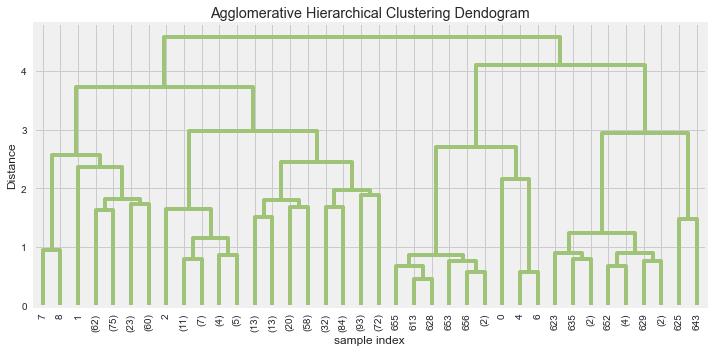

 ======== Truncated Dendogram - Show only last 4 Merged Clusters=====


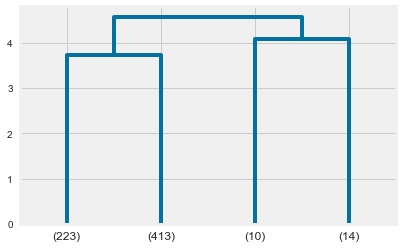

In [198]:
Plot_Agglomerative(Z)

In [199]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_CardReady, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_CardReady))

c

0.7942821700392279

In [200]:
list_Accuracy =  [['Linkage Complete', c]]
df_AccuracyT = pd.DataFrame(list_Accuracy, columns = ['Method', 'Average'])

df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy

,Method,Average
0,Linkage Average,0.83
0,Linkage Complete,0.79


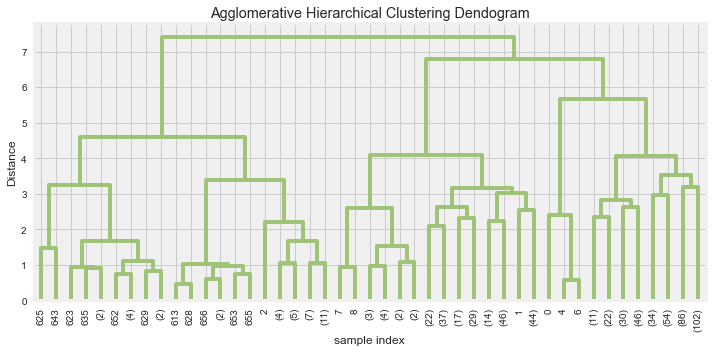

 ======== Truncated Dendogram - Show only last 4 Merged Clusters=====


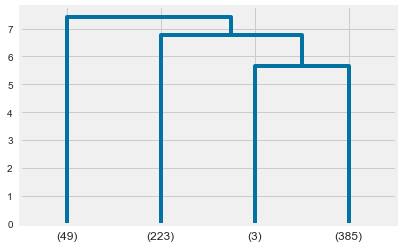

In [201]:
Plot_Agglomerative(Z)

In [202]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_CardReady, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_CardReady))

c

0.7458596043108989

In [203]:
list_Accuracy =  [['Linkage Ward', c]]
df_AccuracyT = pd.DataFrame(list_Accuracy, columns = ['Method', 'Average'])

df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy

,Method,Average
0,Linkage Average,0.83
0,Linkage Complete,0.79
0,Linkage Ward,0.75


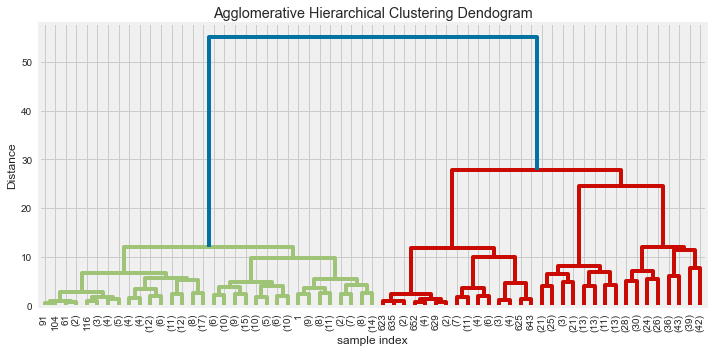

 ======== Truncated Dendogram - Show only last 4 Merged Clusters=====


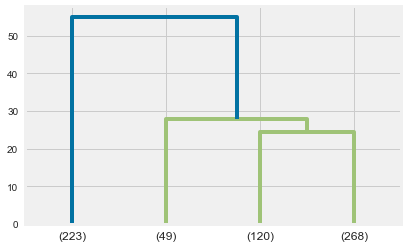

In [204]:
Plot_Agglomerative(Z)

In [205]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_CardReady, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(df_CardReady))

c

0.8160647757606218

In [206]:
list_Accuracy =  [['Linkage Centroid', c]]
df_AccuracyT = pd.DataFrame(list_Accuracy, columns = ['Method', 'Average'])

df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy

,Method,Average
0,Linkage Average,0.83
0,Linkage Complete,0.79
0,Linkage Ward,0.75
0,Linkage Centroid,0.82


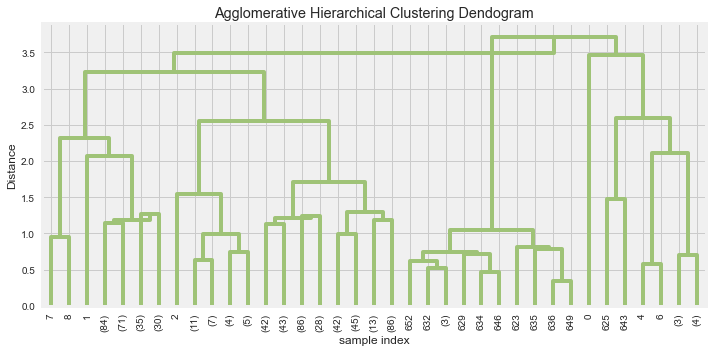

 ======== Truncated Dendogram - Show only last 4 Merged Clusters=====


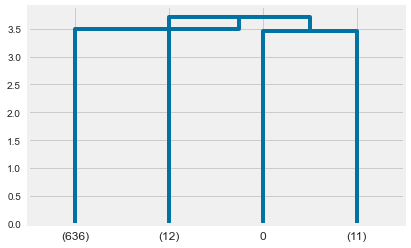

In [207]:
Plot_Agglomerative(Z)

## Plot the dendrogram for the consolidated dataframe.

In [208]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_CardReady, 'ward', metric='euclidean')
Z.shape

(659, 4)

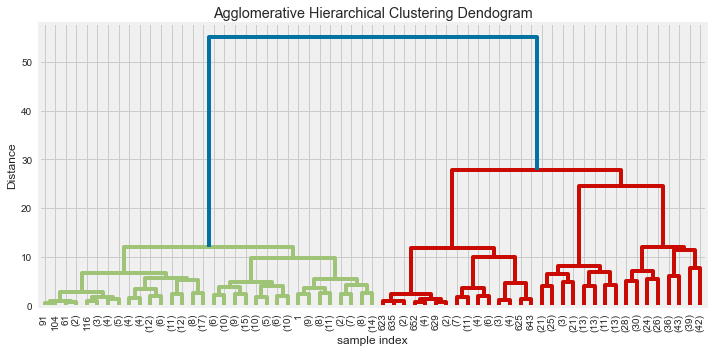

 ======== Truncated Dendogram - Show only last 4 Merged Clusters=====


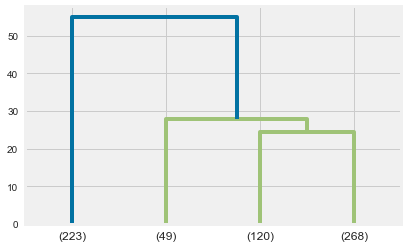

In [209]:
Plot_Agglomerative(Z)

In [210]:
from scipy.cluster.hierarchy import fcluster
max_d = 52
clusters = fcluster(Z, max_d, criterion='distance')

In [211]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(df_CardReady,clusters)

0.4328082468735527

In [212]:
list_Accuracy =  [['HC Silhouette Score', silhouette_score(df_CardReady,clusters)]]
df_AccuracyT = pd.DataFrame(list_Accuracy, columns = ['Method', 'Average'])

df_Accuracy  = pd.concat([df_Accuracy, df_AccuracyT])
df_Accuracy

,Method,Average
0,Linkage Average,0.83
0,Linkage Complete,0.79
0,Linkage Ward,0.75
0,Linkage Centroid,0.82
0,HC Silhouette Score,0.43


### Observations: 
- Silhouette Score is better when closer 1 and worse when closer to -1.
- However, a Silhouette of .43 is actually considered a good score.

## Conclusion:
This analysis started with an EDA in order to get an understanding of the data. During this analysis it was determined the data set has no missing values. However, Average Credit Limit and Total Visits Online contain outliers. I could have ignored these outliers giving that unsupervised learning (e.g. K-Means) is not very sensitive to outliers as a regressions. Nevertheless, it is good practice to handle outliers. Outliers were handled by replacing them with the overall column mean values.  

### K-Means

During the K-Means analysis, a method called ‘Elbow’ was applied in order to determine the optimal number of clusters. This method indicated that a number of clusters of 4, would be the proper number of clusters to be used. After applying the elbow method, I applied the Silhouette method to get an additional indication of the number of Clusters.  The **Silhouette**, however, indicated that a number of clusters of 2 scored the highest with **.43**. While the Silhouette score for 4 clusters scored **.38**. Nevertheless, 2 clusters limits the marketing targeting capabilities since it segments the population in 2 only. While 4 clusters allow us to target each one of these segments differently.
Below is K-Means Groups averages. 

In [82]:
GroupsKMNew.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12184.68,2.40,0.93,3.57,6.91
1,17774.89,5.49,3.65,1.03,1.97
2,57632.91,5.52,3.20,1.04,2.05
3,140857.14,8.84,0.63,10.71,1.08


### Hieararchical Clustering
Hierarchical Clustering algorithm builds classifications trees of the data that mergers groups of similar data points. Four linkage methods were applied (Average, Complete, Ward and Centroid). The Average method scored the highest with **0.83.** However, observations were not well distributed across the clusters. Linkage Ward, despite scoring the lowest with a score of **.75**, has the best observation distribution across four clusters. Plus, the Ward method silhouette has a score of **0.43.** 



In [213]:
df_Accuracy

,Method,Average
0,Linkage Average,0.83
0,Linkage Complete,0.79
0,Linkage Ward,0.75
0,Linkage Centroid,0.82
0,HC Silhouette Score,0.43


When we compared the data distribution across the 4 clusters between K-Means with the Hierarchical, we can see that they yielded very similar data distribution.  The K-means group 3 has very similar data averages as the group 1 from the Hierarchical model. The K-means group 0 equates to Hierarchical group 3 and so one and so forth. Given the similarities on the data distribution and the fact that K-means and Hierarchical have a similar Silhouette scores, we will focus on the K-means model results for the marketing campaign. 

### Proposal Marketing Campaign
When we compared the data distribution across the 4 clusters between K-Means with the Hierarchical, we can see that they yielded very similar data distribution.  The K-means group 3 has very similar data averages as the group 1 from the Hierarchical model. The K-means group 0 equates to Hierarchical group 3 and so one and so forth. Given the similarities on the data distribution and the fact that K-means and Hierarchical have a similar Silhouette scores, we will focus on the K-means model results for the marketing campaign. <br><br>
- Group 3 has by far the highest average credit limit and Total Number of Credit Cards. Therefore, this is a group that may have higher disposable income and more likely to spend money. They can be target for fee base credit card that give them more purchase power. They can also be targeted for additional banking services. This group is also characterized for self-service themselves from online banking since they have the highest average of Total Visits online. Continue to improving the online banking is a big deal for attracting these high credit balance customers.<br><br>
- Group 0 has the lowest Average Credit Limit and the lowest number of Total Credit Cards. This indicates that this is a group that don’t buy much on credit. They also seems to be more comfortable resolving their Banking issues/questions over the phone since they have the highest average of Total Calls Made. This group can be target for debit card or zero fee credit card so that they can pay in full their balance every month. Also, a more user friend online banking system can minimize the number of calls this group perform. <br><br>
- Group 1 has the second lowest Average Credit Limit (about 40% higher than Group 0) and the second highest number of Total Credit Cards. They don’t make much phone calls but they like to do face-to-face banking since they have the highest Total Visit Banking. For customers that fall in this group a good, dependable and friendly online banking can be an attractive selling point for them. Also, they may be persuade to purchase other banking services if they perceive online transactions as secure and friendly. <br><br>
- Group 2 has the second highest Average Credit Limit, Total Credit Cards, Total Visits Bank and Total Calls Made. There are lots of opportunities within this group. They seems to have disposable income but prefer to handle baking issues over the phone or in person. This group shall be target with a market campaign focusing on additional banking products and the easy of banking online. If the customer make phone calls or in-person visits, this is an indication that they think their issues can’t be mitigated online. This group has lots of potential for additional banking products.<br><br> 



In [216]:
GroupsKMNew.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12184.68,2.40,0.93,3.57,6.91
1,17774.89,5.49,3.65,1.03,1.97
2,57632.91,5.52,3.20,1.04,2.05
3,140857.14,8.84,0.63,10.71,1.08
